# Họ và Tên: Lâm Quang Phú
# MSSV: 21094601

In [28]:
import pandas as pd 
import numpy as np

## Bài 1:
**Cho dữ liệu như sau:**

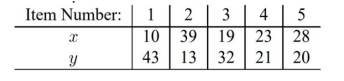

**Sử dụng thư viện tính Ma trận hiệp phương sai của dữ liệu trên**

In [29]:
data = [
    [10, 39, 19, 23, 28],  # x values
    [43, 13, 32, 21, 20]   # y values
]

df_manual = pd.DataFrame(data).transpose()
df_manual.columns = ['x', 'y']
cov_matrix_manual = np.cov(df_manual, rowvar=False)
cov_matrix_manual

array([[ 115.7 , -120.55],
       [-120.55,  138.7 ]])

## Bài 2

**Cho dữ liệu như sau**

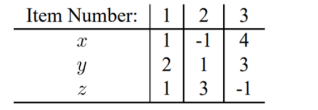

**Sử dụng thư viện tính Ma trận hiệp phương sai của dữ liệu trên**

In [30]:
data = [
    [1, -1, 4],  # x values
    [2, 1, 3], # y values
    [1, 3, -1] # z values
]

df_manual = pd.DataFrame(data).transpose()
df_manual.columns = ['x', 'y', 'z']
cov_matrix_manual = np.cov(df_manual, rowvar=False)
cov_matrix_manual

array([[ 6.33333333,  2.5       , -5.        ],
       [ 2.5       ,  1.        , -2.        ],
       [-5.        , -2.        ,  4.        ]])

## Bài 3:
**Hãy tính các Eigenvector and Eigenvalue sử dụng thư viện numpy của các ví dụ
sau:**

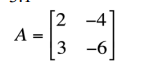

In [31]:

A = np.array([
    [2, -4],
    [3, -6]
])

# Calculate the eigenvalues and eigenvectors for matrix A
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvalues, eigenvectors


(array([ 0., -4.]),
 array([[0.89442719, 0.5547002 ],
        [0.4472136 , 0.83205029]]))

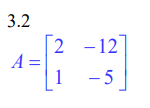

In [32]:

A = np.array([
    [2, -12],
    [1, -5]
])

# Calculate the eigenvalues and eigenvectors for matrix A
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvalues, eigenvectors


(array([-1., -2.]),
 array([[0.9701425 , 0.9486833 ],
        [0.24253563, 0.31622777]]))

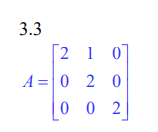

In [33]:

A = np.array([
    [2, 1, 0],
    [0, 2, 0],
    [0, 0, 2]
])

# Calculate the eigenvalues and eigenvectors for matrix A
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvalues, eigenvectors


(array([2., 2., 2.]),
 array([[ 1.0000000e+00, -1.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  4.4408921e-16,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00]]))

**3.4 Viết hàm tính Eigenvector and Eigenvalue tự động từ bất kỳ ma trận đầu vào 
nào**

In [34]:
def calculate_eigenvectors_and_values(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues, eigenvectors


example_matrix = np.array([
    [4, 2],
    [1, 3]
])

# Call the function with the example matrix
e_vals, e_vecs = calculate_eigenvectors_and_values(example_matrix)
(e_vals, e_vecs)


(array([5., 2.]),
 array([[ 0.89442719, -0.70710678],
        [ 0.4472136 ,  0.70710678]]))

## Bài 4:
**Giải thuật PCA được trình bày như sau, hãy tự cài đặt lại giải thuật này và áp dụng 
vào một bộ dữ liệu cụ thể, trực quan kết quả đạt được:**


In [35]:
def pca(data, r):

   # Bước 1: Tính vectơ trung bình và ma trận hiệp phương sai
    mean_vector = np.mean(data, axis=0)
    cov_matrix = np.cov(data.T)

    # Bước 2: Tính vectơ riêng và giá trị riêng của ma trận hiệp phương sai
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Bước 3: Sắp xếp các vectơ riêng theo giá trị riêng giảm dần, chọn r vectơ riêng cao nhất
    idx = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[idx]
    sorted_eigenvectors = eigenvectors[:, idx]
    selected_eigenvectors = sorted_eigenvectors[:, :r]

    # Bước 4: Chiếu các điểm lên không gian con được bao bởi các vectơ riêng r trên cùng
    projected_data = (data - mean_vector).dot(selected_eigenvectors)

    return projected_data, sorted_eigenvalues, selected_eigenvectors

In [36]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
iris_data = iris.data

# Standardize the data
scaler = StandardScaler()
iris_standardized = scaler.fit_transform(iris_data)

# Apply PCA to the Iris dataset
projected_iris, iris_eigenvalues, iris_eigenvectors = pca(iris_standardized, r=2)

# Results
(projected_iris, iris_eigenvalues, iris_eigenvectors)


(array([[-2.26470281, -0.4800266 ],
        [-2.08096115,  0.67413356],
        [-2.36422905,  0.34190802],
        [-2.29938422,  0.59739451],
        [-2.38984217, -0.64683538],
        [-2.07563095, -1.48917752],
        [-2.44402884, -0.0476442 ],
        [-2.23284716, -0.22314807],
        [-2.33464048,  1.11532768],
        [-2.18432817,  0.46901356],
        [-2.1663101 , -1.04369065],
        [-2.32613087, -0.13307834],
        [-2.2184509 ,  0.72867617],
        [-2.6331007 ,  0.96150673],
        [-2.1987406 , -1.86005711],
        [-2.26221453, -2.68628449],
        [-2.2075877 , -1.48360936],
        [-2.19034951, -0.48883832],
        [-1.898572  , -1.40501879],
        [-2.34336905, -1.12784938],
        [-1.914323  , -0.40885571],
        [-2.20701284, -0.92412143],
        [-2.7743447 , -0.45834367],
        [-1.81866953, -0.08555853],
        [-2.22716331, -0.13725446],
        [-1.95184633,  0.62561859],
        [-2.05115137, -0.24216355],
        [-2.16857717, -0.527

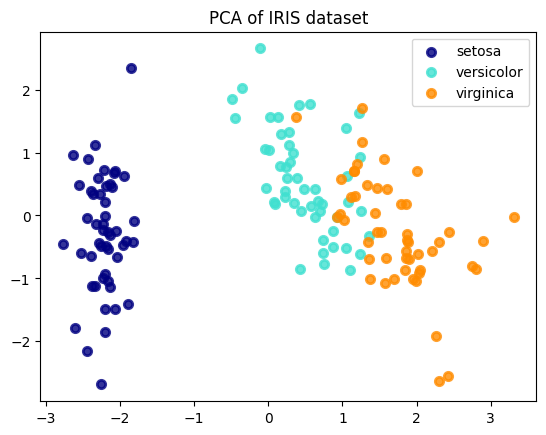

In [37]:
import matplotlib.pyplot as plt

def plot_pca(projected_data, target, target_names):
    colors = ['navy', 'turquoise', 'darkorange']
    lw = 2

    # Plot each class
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(projected_data[target == i, 0], projected_data[target == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of IRIS dataset')

plot_pca(projected_iris, iris.target, iris.target_names)
plt.show()


 **Có thể thấy rõ sự phân tách giữa các loài, đặc biệt là Iris Setosa (màu xanh lam) tách biệt hoàn toàn so với hai loài còn lại**

## Bài 5:
**Cài đặt giải thuật SVD và ứng dụng giải thuật này vào bộ dữ liệu đã dùng ở bài 4**

In [38]:
from scipy.linalg import svd

def apply_svd(data):
    """
    Áp dụng Phân tách giá trị số ít (SVD) cho dữ liệu được cung cấp.

    :param data: Một mảng numpy 2D trong đó mỗi hàng là một điểm dữ liệu.
    :return: U, S, Vt - Ma trận sinh ra từ SVD
    """
    # Căn giữa dữ liệu bằng cách trừ giá trị trung bình
    data -= np.mean(data, axis=0)

    # Apply SVD
    U, S, Vt = svd(data, full_matrices=False)
    return U, S, Vt


U_iris, S_iris, Vt_iris = apply_svd(iris_standardized)
(U_iris.shape, S_iris.shape, Vt_iris.shape)


((150, 4), (4,), (4, 4))

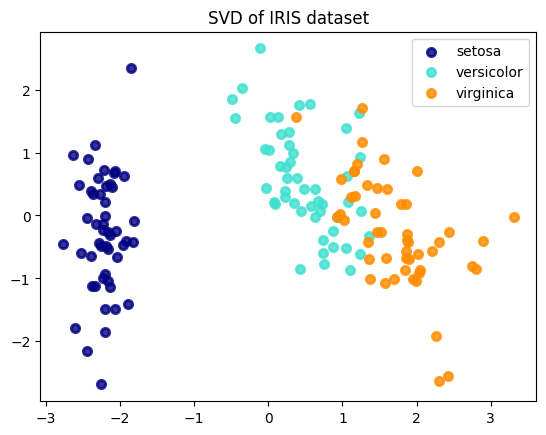

In [39]:
def plot_svd(U, S, Vt, target, target_names):
    """
    Vẽ biểu đồ kết quả của SVD. Biểu đồ sẽ hiển thị dữ liệu trong không gian của hai vectơ số ít đầu tiên.

    :param U: Ma trận U từ SVD chứa các vectơ số ít bên trái.
    :param S: Các giá trị số ít từ SVD.
    :param Vt: Ma trận Vt từ SVD chứa các vectơ số ít bên phải (chuyển vị).
    :param target: Nhãn đích cho tập dữ liệu.
    :param target_names: Tên của các lớp mục tiêu.
    """
    # Chiếu dữ liệu lên hai vectơ số ít đầu tiên
    # S là mảng 1D gồm các giá trị số ít, ta cần chuyển nó thành ma trận đường chéo
    S_matrix = np.diag(S)
    projected_data = U @ S_matrix[:, :2]
    colors = ['navy', 'turquoise', 'darkorange']
    lw = 2

    # Plot each class
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(projected_data[target == i, 0], projected_data[target == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('SVD of IRIS dataset')

plot_svd(U_iris, S_iris, Vt_iris, iris.target, iris.target_names)
plt.show()


**Dữ liệu Iris đã được trực quan hóa sau khi áp dụng SVD. Biểu đồ trên cho thấy các điểm dữ liệu được biểu diễn trong không gian của hai vector suy biến đầu tiên. Các lớp khác nhau của loài hoa Iris được biểu diễn bởi các màu khác nhau:**

+ Setosa (màu xanh navy)
+ Versicolor (màu xanh ngọc)
+ Virginica (màu cam)

**Biểu đồ này giúp ta có thể thấy cách các loài hoa Iris được phân tách trong không gian đặc trưng mới sau khi giảm chiều, giúp ta hiểu rõ hơn về cấu trúc dữ liệu.**